Emotion detection (ED) is a brach of sentiment analysis that deals with the extraction and analysis of emotions. The evolution of web 2.0 has put text mining and analysis at the frontiers of organizational success. It helps service provider provide tailor-made services to their customers. Numerous studies are being carried out in the area of text mining and analysis due to the ease in sourcing for data and the vast benefits its deliverable offers.

### Content

There are two columns
* Text
* Emotion

The emotions column has various categories ranging from happiness to sadness to love and fear.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

### Read 'Emotion_final.csv' and store it in a dataframe variable

In [2]:
df=pd.read_csv('Emotion_final.csv')

### View head

In [3]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Print some of the texts

In [5]:
df['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object

### Check unique values in Emotion

In [6]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

### View info of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


### Check for null values, Remove if any

In [8]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

### Check for duplicates, Remove if any

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

### Print some of the happy text

In [12]:
df[df['Emotion'] == 'happy']['Text']

8        i have been with petronas for years i feel tha...
11       i do feel that running is a divine experience ...
14       i have immense sympathy with the general point...
15         i do not feel reassured anxiety is on each side
22         i have the feeling she was amused and delighted
                               ...                        
20263    He uttered a short sharp bark , which made Ros...
20264    He considered this thoughtfully , then a gleam...
20265    A look of intense amusement crossed Catherine ...
20266    As a toddler she filled in concentric circles ...
20267    A smile of amusement played on his lips as he ...
Name: Text, Length: 7028, dtype: object

### Print some of the sadness texts

In [13]:
df[df['Emotion'] == 'sadness']['Text']

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
5        ive been feeling a little burdened lately wasn...
10       i feel like i have to make the suffering i m s...
13                      i feel low energy i m just thirsty
                               ...                        
20731    The tears came , and rapidly dissolved her ang...
20732    Through a swell of tears Ruth stared incredulo...
20733           She glanced down at the linoleum in despai
20734    Perhaps it was despair that made me believe th...
20735               That he forgot his guest in his despai
Name: Text, Length: 6265, dtype: object

### Print some of the surpise texts

In [14]:
df[df['Emotion'] == 'surprise']['Text']

6        ive been taking or milligrams or times recomme...
32       i have seen heard and read over the past coupl...
57       i keep feeling pleasantly surprised at his sup...
64       i am now nearly finished the week detox and i ...
129      i too feel as if i am a stranger in a strange ...
                               ...                        
20891    If the birds are disturbed during the process ...
20892    It was Blackberry who bullied the stupefied Pi...
20893    He woke stupefied , flicking his tongue over h...
20894             Laura stared up at Ross in stupefied ama
20895    The pain had faded into the background and she...
Name: Text, Length: 879, dtype: object

### Plot a countplot of Emotions

<Axes: xlabel='count', ylabel='Emotion'>

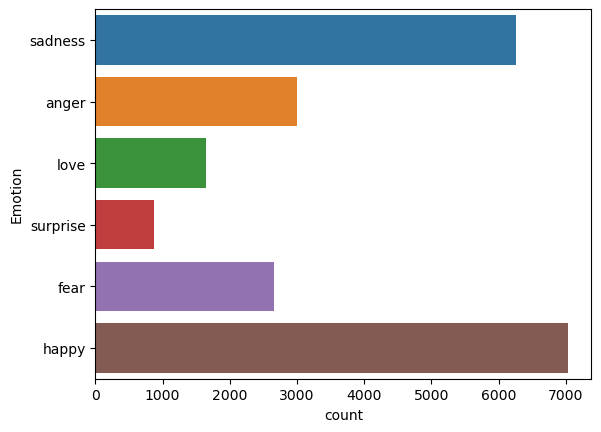

In [16]:
sns.countplot(y=df['Emotion'])

### Convert Emotions column to numerical values using Label encoder

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder=LabelEncoder()

In [22]:
df['Emotion']=encoder.fit_transform(df['Emotion'])

In [23]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


### Store the classes in a list
* use le.classes_ to fetch the classes

In [25]:
classes=encoder.classes_

In [26]:
classes

array(['anger', 'fear', 'happy', 'love', 'sadness', 'surprise'],
      dtype=object)

### Import WordNetLemmatizer, stopwords

In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### Create a function to preprocess the text (lemmatize,lower,remove stopwords, remove special characters)

In [33]:
def pre(sentence):
    tex = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    words = [x.lower() for x in tex if x not in stopwords.words('english')]
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    word = ' '.join(word)
    return word

### Apply the function to Text in our dataframe

In [34]:
df['Text']=df['Text'].apply(pre)

### View some of the texts after preprocessing

In [35]:
for i in range(10):
    print(df['Text'][i])

didnt feel humiliate
go feel hopeless damn hopeful around someone care awake
im grab minute post feel greedy wrong
ever feel nostalgic fireplace know still property
feel grouchy
ive feel little burden lately wasnt sure
ive take milligrams time recommend amount ive fall asleep lot faster also feel like funny
feel confuse life teenager jade year old man
petronas years feel petronas perform well make huge profit
feel romantic


### Convert text to vectors

In [37]:
X=df['Text']
y=df['Emotion']

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tf=TfidfVectorizer()

In [40]:
vx=tf.fit_transform(X)

In [41]:
vx.shape

(21456, 15553)

### Split the dataset into training and Testing set

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(vx, y, test_size=0.2, random_state=42)

### Create a Random forest classifier model

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model=RandomForestClassifier(n_estimators=50)

### Train the model

In [47]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

### Check the score of the model

In [48]:
model.score(X_train,y_train)

0.9975530179445351

### Make predictions with X_test

In [49]:
y_pred=model.predict(X_test)

### Check the accuracy of our prediction

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
accuracy_score(y_test,y_pred)

0.8664958061509785

### Create confusion matrix

<Axes: >

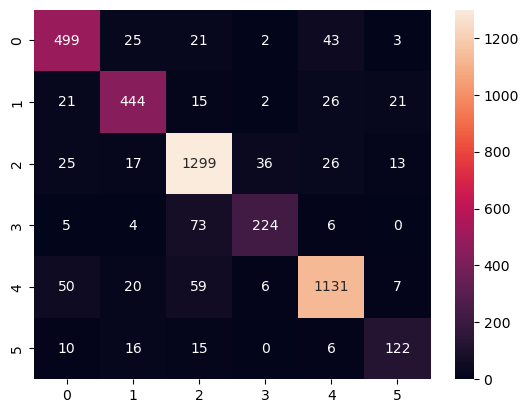

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Create classification report

In [53]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83       593\n           1       0.84      0.84      0.84       529\n           2       0.88      0.92      0.90      1416\n           3       0.83      0.72      0.77       312\n           4       0.91      0.89      0.90      1273\n           5       0.73      0.72      0.73       169\n\n    accuracy                           0.87      4292\n   macro avg       0.84      0.82      0.83      4292\nweighted avg       0.87      0.87      0.87      4292\n'